# 1) Mount the Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [3]:
%cd /content/drive/MyDrive/Topic_Modelling/data

/content/drive/MyDrive/Topic_Modelling/data


In [4]:
!pip install -U contextualized_topic_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.4 MB/s 
     |████████████████████████████████| 783 kB 50.8 MB/s 
     |████████████████████████████████| 121 kB 66.8 MB/s 
     |████████████████████████████████| 24.1 MB 1.8 MB/s 
     |████████████████████████████████| 1.4 MB 67.3 MB/s 
     |████████████████████████████████| 1.6 MB 41.7 MB/s 
     |████████████████████████████████| 109 kB 42.8 MB/s 
     |████████████████████████████████| 5.5 MB 53.6 MB/s 
     |████████████████████████████████| 1.3 MB 57.7 MB/s 
     |████████████████████████████████| 163 kB 58.4 MB/s 
     |████████████████████████████████| 7.6 MB 38.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=24132ae0e2308dc4789431f2eae96ac0147a08a6b19b1170a08c4fe6de30aac0
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc

In [5]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 2) Import the packages

In [6]:
from contextualized_topic_models.models.ctm import CombinedTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessingStopwords
import nltk

# 3) Data Preprocessing

In [7]:
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessing
from nltk.corpus import stopwords as stop_words

nltk.download('stopwords') # stopwrods to be removed

text_file = "Five_companies_transcript.txt" # the file that contains our docuemtns

documents = [line.strip() for line in open(text_file, encoding="utf-8").readlines()[0:2000]]
stopwords = list(stop_words.words("english"))

# simple preprocessing that removes stopwords and punctuation
sp = WhiteSpacePreprocessingStopwords(documents, stopwords_list=stopwords)

# this function returns the pre and the unpre processed documents and a vocab with the most frequent 2K tokens
# these tokens are going to be used to represent the topics
preprocessed_documents, unpreprocessed_corpus, vocab, retained_indices = sp.preprocess()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
!head -n 2 Five_companies_transcript.txt

Operator
Welcome, and thank you for joining the Wells Fargo Second Quarter 2022 Earnings Conference Call. All lines have been placed on mute to prevent any background noise. After the speakers' remarks, there will be a question-and-answer session. [Operator Instructions] Please note that today's call is being recorded. I would now like to turn the call over to your host, John Campbell, Director of Investor Relations. Sir, you may begin the conference.


In [9]:
preprocessed_documents[:2]

['operator',
 'welcome thank joining wells fargo second quarter earnings conference call lines placed background noise speakers remarks question answer session operator instructions please note today call recorded would like turn call john campbell investor relations sir may begin conference']

# 4) Training the dataset on different transformers

## i) Finbert Transformer

In [10]:
from contextualized_topic_models.models.ctm import ZeroShotTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation

tp = TopicModelDataPreparation("ProsusAI/finbert") # instantiate a contextualized model

# create the training set
training_dataset = tp.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.85k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/758 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/252 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/ProsusAI_finbert were not used when initializing BertModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.7/dist-packages/contextualized_topic_models/utils/data_preparation.py:57: UserWarning: the longest document in your collection has 304 words, the model instead truncates to 128 tokens.
  warnings.warn(f"the longest document in your collection has {max_local_length} words, the model instead "


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
tp.vocab[:10]

['ability',
 'able',
 'absolutely',
 'acacia',
 'accelerate',
 'accelerated',
 'accelerates',
 'accelerating',
 'acceleration',
 'access']

In [12]:
tp.vocab[:]

['ability',
 'able',
 'absolutely',
 'acacia',
 'accelerate',
 'accelerated',
 'accelerates',
 'accelerating',
 'acceleration',
 'access',
 'accessing',
 'accommodation',
 'accompany',
 'accomplish',
 'account',
 'accounted',
 'accounting',
 'accounts',
 'accreted',
 'accretes',
 'accretive',
 'accrual',
 'accruals',
 'accrue',
 'accuracy',
 'achievable',
 'achieve',
 'achieving',
 'acquisitions',
 'across',
 'actions',
 'active',
 'actively',
 'activities',
 'activity',
 'actual',
 'actually',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'additionally',
 'address',
 'addressable',
 'adjusting',
 'adjustments',
 'admired',
 'admitted',
 'adopt',
 'adopting',
 'advanced',
 'advancing',
 'advantage',
 'advertise',
 'advertising',
 'advice',
 'advise',
 'advisers',
 'advisory',
 'advocate',
 'affect',
 'affiliated',
 'affluent',
 'affordable',
 'afternoon',
 'afterwards',
 'agencies',
 'aggregate',
 'aggressive',
 'aggressively',
 'agile',
 'agility',
 'ago',
 'agreement',
 '

# 5) Training our Combined TM

In [13]:
# train the model
# input_size is the size of our vocabulary
# bert_input_size is the size of the embedding that comes from the contextualized model
# n_components is the number of topic we are going to get from the model
# n_epochs is the number of epochs we are going to train our model for
ctm = CombinedTM(bow_size=len(tp.vocab), contextual_size=768, n_components=10, num_epochs=10)
ctm.fit(training_dataset) # run the model

Epoch: [10/10]	 Seen Samples: [10880/11470]	Train Loss: 103.91742661420037	Time: 0:00:01.290150: : 10it [00:11,  1.17s/it]
Sampling: [20/20]: : 20it [00:11,  1.70it/s]


# 6) Getting the Topics

In [14]:
ctm.get_topic_lists()

[['discussed',
  'gig',
  'brief',
  'confirmed',
  'predictive',
  'advice',
  'leaders',
  'unreasonable',
  'wrongdoing',
  'additionally'],
 ['see',
  'really',
  'thanks',
  'would',
  'today',
  'us',
  'look',
  'say',
  'forward',
  'coming'],
 ['opportunities',
  'perfect',
  'thank',
  'range',
  'together',
  'list',
  'reserve',
  'real',
  'supposed',
  'wallet'],
 ['higher',
  'going',
  'card',
  'loan',
  'revenue',
  'year',
  'total',
  'growth',
  'ago',
  'supply'],
 ['zoom',
  'advice',
  'adopt',
  'tough',
  'scroll',
  'address',
  'queue',
  'differentiation',
  'lack',
  'yielding'],
 ['strong',
  'quarter',
  'revenue',
  'loan',
  'growth',
  'going',
  'time',
  'increase',
  'get',
  'first'],
 ['year',
  'growth',
  'quarter',
  'revenue',
  'think',
  'higher',
  'see',
  'basis',
  'approximately',
  'driven'],
 ['see',
  'strong',
  'small',
  'think',
  'like',
  'big',
  'sort',
  'continue',
  'demand',
  'get'],
 ['views',
  'keith',
  'disconnect'

In [15]:
ctm.get_topics()

defaultdict(list,
            {0: ['discussed',
              'gig',
              'brief',
              'confirmed',
              'predictive',
              'advice',
              'leaders',
              'unreasonable',
              'wrongdoing',
              'additionally'],
             1: ['see',
              'really',
              'thanks',
              'would',
              'today',
              'us',
              'look',
              'say',
              'forward',
              'coming'],
             2: ['opportunities',
              'perfect',
              'thank',
              'range',
              'together',
              'list',
              'reserve',
              'real',
              'supposed',
              'wallet'],
             3: ['higher',
              'going',
              'card',
              'loan',
              'revenue',
              'year',
              'total',
              'growth',
              'ago',
              'supply'],

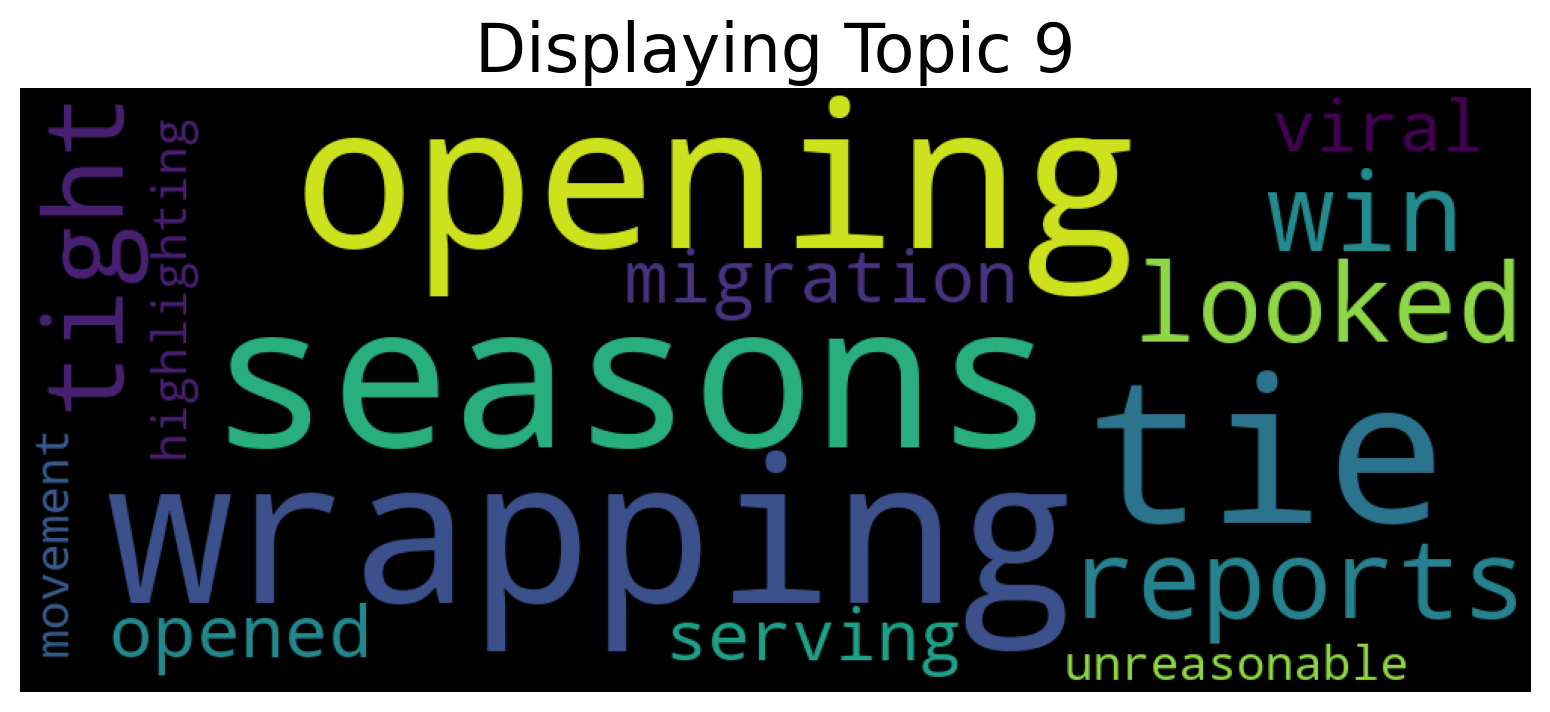

In [16]:
ctm.get_wordcloud(topic_id=9, n_words=15)

# 7) Using PyLDAvis for Visualization

In [17]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=d93fc736df30ea0f4e3ec83468d8970a4673e437e2c7e5057480f0fa73368bb6
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=6e11fb9bf5f8976f024f908e166ac1fd4ef00be5964a2fcc2517aa1a60d9fffa
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [18]:
lda_vis_data = ctm.get_ldavis_data_format(tp.vocab, training_dataset, n_samples=10)

Sampling: [10/10]: : 10it [00:08,  1.14it/s]


In [19]:
import pyLDAvis as vis
lda_vis_data = ctm.get_ldavis_data_format(tp.vocab, training_dataset, n_samples=10)
ctm_pd = vis.prepare(**lda_vis_data)
vis.display(ctm_pd)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
Sampling: [10/10]: : 10it [00:06,  1.62it/s]
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


# 8) Topic Predictions

In [20]:
topics_predictions = ctm.get_thetas(training_dataset, n_samples=5) # get all the topic predictions

Sampling: [5/5]: : 5it [00:03,  1.25it/s]


In [21]:
preprocessed_documents[0] # see the text of our preprocessed document

'operator'

In [22]:
import numpy as np
topic_number = np.argmax(topics_predictions[0]) # get the topic id of the first document

In [23]:
topic_number

9

In [24]:
ctm.get_topic_lists(5)[5]

['strong', 'quarter', 'revenue', 'loan', 'growth']

In [25]:
ctm.get_topic_lists(5)[topic_number] 

['tie', 'opening', 'seasons', 'wrapping', 'reports']

## ii) all-mpnet-base-v2 Transformer

In [26]:
from contextualized_topic_models.models.ctm import ZeroShotTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation

tp1 = TopicModelDataPreparation("all-mpnet-base-v2") # instantiate a contextualized model

# create the training set
training_dataset = tp1.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/contextualized_topic_models/utils/data_preparation.py:57: UserWarning: the longest document in your collection has 304 words, the model instead truncates to 128 tokens.
  warnings.warn(f"the longest document in your collection has {max_local_length} words, the model instead "


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
tp1.vocab[:10]

['ability',
 'able',
 'absolutely',
 'acacia',
 'accelerate',
 'accelerated',
 'accelerates',
 'accelerating',
 'acceleration',
 'access']

In [28]:
tp1.vocab[:]

['ability',
 'able',
 'absolutely',
 'acacia',
 'accelerate',
 'accelerated',
 'accelerates',
 'accelerating',
 'acceleration',
 'access',
 'accessing',
 'accommodation',
 'accompany',
 'accomplish',
 'account',
 'accounted',
 'accounting',
 'accounts',
 'accreted',
 'accretes',
 'accretive',
 'accrual',
 'accruals',
 'accrue',
 'accuracy',
 'achievable',
 'achieve',
 'achieving',
 'acquisitions',
 'across',
 'actions',
 'active',
 'actively',
 'activities',
 'activity',
 'actual',
 'actually',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'additionally',
 'address',
 'addressable',
 'adjusting',
 'adjustments',
 'admired',
 'admitted',
 'adopt',
 'adopting',
 'advanced',
 'advancing',
 'advantage',
 'advertise',
 'advertising',
 'advice',
 'advise',
 'advisers',
 'advisory',
 'advocate',
 'affect',
 'affiliated',
 'affluent',
 'affordable',
 'afternoon',
 'afterwards',
 'agencies',
 'aggregate',
 'aggressive',
 'aggressively',
 'agile',
 'agility',
 'ago',
 'agreement',
 '

In [29]:
# train the model
# input_size is the size of our vocabulary
# bert_input_size is the size of the embedding that comes from the contextualized model
# n_components is the number of topic we are going to get from the model
# n_epochs is the number of epochs we are going to train our model for
ctm = CombinedTM(bow_size=len(tp1.vocab), contextual_size=768, n_components=10, num_epochs=10)
ctm.fit(training_dataset) # run the model

Epoch: [10/10]	 Seen Samples: [10880/11470]	Train Loss: 103.38966773538029	Time: 0:00:01.075423: : 10it [00:10,  1.10s/it]
Sampling: [20/20]: : 20it [00:13,  1.51it/s]


In [30]:
# Getting the topics
ctm.get_topic_lists(5)

[['sectors', 'stated', 'tens', 'automation', 'weeks'],
 ['quarter', 'year', 'would', 'growth', 'strong'],
 ['growth', 'year', 'grew', 'increased', 'billion'],
 ['automation', 'organically', 'bottom', 'almost', 'mainly'],
 ['think', 'see', 'would', 'business', 'right'],
 ['like', 'think', 'us', 'really', 'customers'],
 ['autograph', 'weaker', 'almost', 'whereas', 'borrowings'],
 ['consideration', 'shut', 'tune', 'assumes', 'voice'],
 ['automation', 'tens', 'borrowings', 'sectors', 'stated'],
 ['tens', 'accomplish', 'stated', 'bottom', 'sectors']]

In [31]:
ctm.get_topics()

defaultdict(list,
            {0: ['sectors',
              'stated',
              'tens',
              'automation',
              'weeks',
              'amortization',
              'successfully',
              'challenging',
              'tune',
              'thoughtful'],
             1: ['quarter',
              'year',
              'would',
              'growth',
              'strong',
              'think',
              'demand',
              'business',
              'little',
              'revenue'],
             2: ['growth',
              'year',
              'grew',
              'increased',
              'billion',
              'quarter',
              'non',
              'continue',
              'income',
              'business'],
             3: ['automation',
              'organically',
              'bottom',
              'almost',
              'mainly',
              'weaker',
              'alluded',
              'potentially',
              'mu

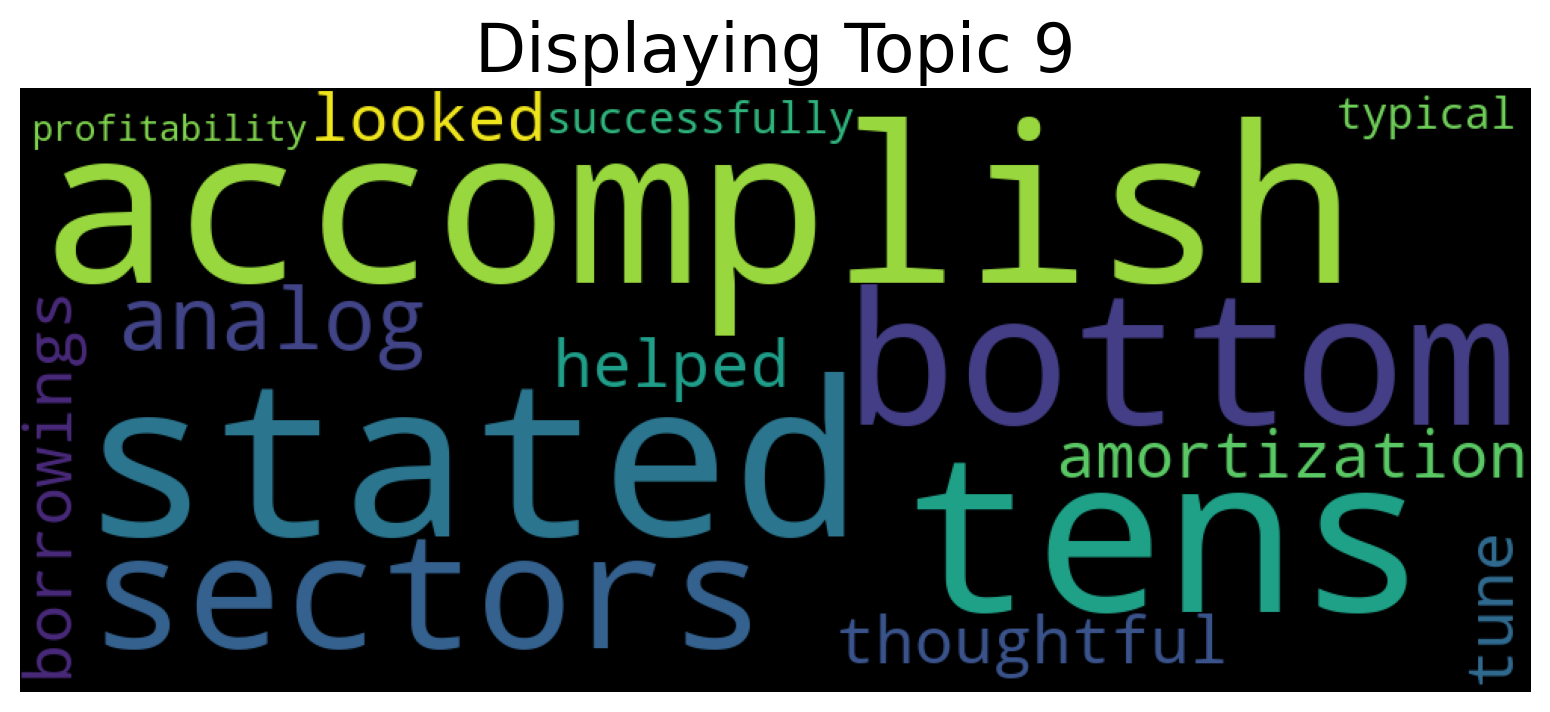

In [32]:
ctm.get_wordcloud(topic_id=9, n_words=15)

In [33]:
# PyLDAvis Visualization
lda_vis_data = ctm.get_ldavis_data_format(tp1.vocab, training_dataset, n_samples=10)

Sampling: [10/10]: : 10it [00:06,  1.56it/s]


In [34]:
import pyLDAvis as vis
lda_vis_data = ctm.get_ldavis_data_format(tp1.vocab, training_dataset, n_samples=10)
ctm_pd = vis.prepare(**lda_vis_data)
vis.display(ctm_pd)

Sampling: [10/10]: : 10it [00:06,  1.59it/s]
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:302: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  token_table['Freq'] = token_table['Freq'].round()
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [35]:
# Topic predictions
topics_predictions = ctm.get_thetas(training_dataset, n_samples=5) # get all the topic predictions

Sampling: [5/5]: : 5it [00:03,  1.54it/s]


In [36]:
preprocessed_documents[0] # see the text of our preprocessed document

'operator'

In [37]:
import numpy as np
topic_number = np.argmax(topics_predictions[0]) # get the topic id of the first document

In [38]:
topic_number

9

In [39]:
ctm.get_topic_lists(5)[5]

['like', 'think', 'us', 'really', 'customers']

In [40]:
ctm.get_topic_lists(5)[topic_number]

['tens', 'accomplish', 'stated', 'bottom', 'sectors']

## iii) all-distilroberta-v1 Transformer

In [41]:
from contextualized_topic_models.models.ctm import ZeroShotTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation

tp2 = TopicModelDataPreparation("all-distilroberta-v1") # instantiate a contextualized model

# create the training set
training_dataset = tp2.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/653 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/329M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/contextualized_topic_models/utils/data_preparation.py:57: UserWarning: the longest document in your collection has 304 words, the model instead truncates to 128 tokens.
  warnings.warn(f"the longest document in your collection has {max_local_length} words, the model instead "


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [42]:
tp2.vocab[:10]

['ability',
 'able',
 'absolutely',
 'acacia',
 'accelerate',
 'accelerated',
 'accelerates',
 'accelerating',
 'acceleration',
 'access']

In [43]:
tp2.vocab[:]

['ability',
 'able',
 'absolutely',
 'acacia',
 'accelerate',
 'accelerated',
 'accelerates',
 'accelerating',
 'acceleration',
 'access',
 'accessing',
 'accommodation',
 'accompany',
 'accomplish',
 'account',
 'accounted',
 'accounting',
 'accounts',
 'accreted',
 'accretes',
 'accretive',
 'accrual',
 'accruals',
 'accrue',
 'accuracy',
 'achievable',
 'achieve',
 'achieving',
 'acquisitions',
 'across',
 'actions',
 'active',
 'actively',
 'activities',
 'activity',
 'actual',
 'actually',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'additionally',
 'address',
 'addressable',
 'adjusting',
 'adjustments',
 'admired',
 'admitted',
 'adopt',
 'adopting',
 'advanced',
 'advancing',
 'advantage',
 'advertise',
 'advertising',
 'advice',
 'advise',
 'advisers',
 'advisory',
 'advocate',
 'affect',
 'affiliated',
 'affluent',
 'affordable',
 'afternoon',
 'afterwards',
 'agencies',
 'aggregate',
 'aggressive',
 'aggressively',
 'agile',
 'agility',
 'ago',
 'agreement',
 '

In [44]:
# train the model
# input_size is the size of our vocabulary
# bert_input_size is the size of the embedding that comes from the contextualized model
# n_components is the number of topic we are going to get from the model
# n_epochs is the number of epochs we are going to train our model for
ctm = CombinedTM(bow_size=len(tp2.vocab), contextual_size=768, n_components=10, num_epochs=10)
ctm.fit(training_dataset) # run the model

Epoch: [10/10]	 Seen Samples: [10880/11470]	Train Loss: 102.66098336612477	Time: 0:00:01.155318: : 10it [00:11,  1.12s/it]
Sampling: [20/20]: : 20it [00:12,  1.59it/s]


In [45]:
# Getting the topics
ctm.get_topic_lists(5)

[['worked', 'assess', 'aggressive', 'variability', 'shenzhen'],
 ['year', 'share', 'quarter', 'market', 'revenue'],
 ['year', 'market', 'approximately', 'think', 'customers'],
 ['quarter', 'time', 'us', 'strong', 'business'],
 ['square', 'facing', 'suisse', 'turnaround', 'accelerated'],
 ['strong', 'business', 'think', 'even', 'last'],
 ['standpoint', 'strengthening', 'behaviors', 'turnaround', 'square'],
 ['capability', 'aggressively', 'amortization', 'stressed', 'combine'],
 ['behaviors', 'sufficient', 'standpoint', 'using', 'uptick'],
 ['us', 'know', 'even', 'one', 'think']]

In [46]:
ctm.get_topics()

defaultdict(list,
            {0: ['worked',
              'assess',
              'aggressive',
              'variability',
              'shenzhen',
              'sided',
              'unfortunately',
              'uncollectible',
              'catch',
              'widening'],
             1: ['year',
              'share',
              'quarter',
              'market',
              'revenue',
              'ago',
              'versus',
              'growth',
              'well',
              'business'],
             2: ['year',
              'market',
              'approximately',
              'think',
              'customers',
              'growth',
              'per',
              'last',
              'demand',
              'quarter'],
             3: ['quarter',
              'time',
              'us',
              'strong',
              'business',
              'last',
              'point',
              'first',
              'year',
              'c

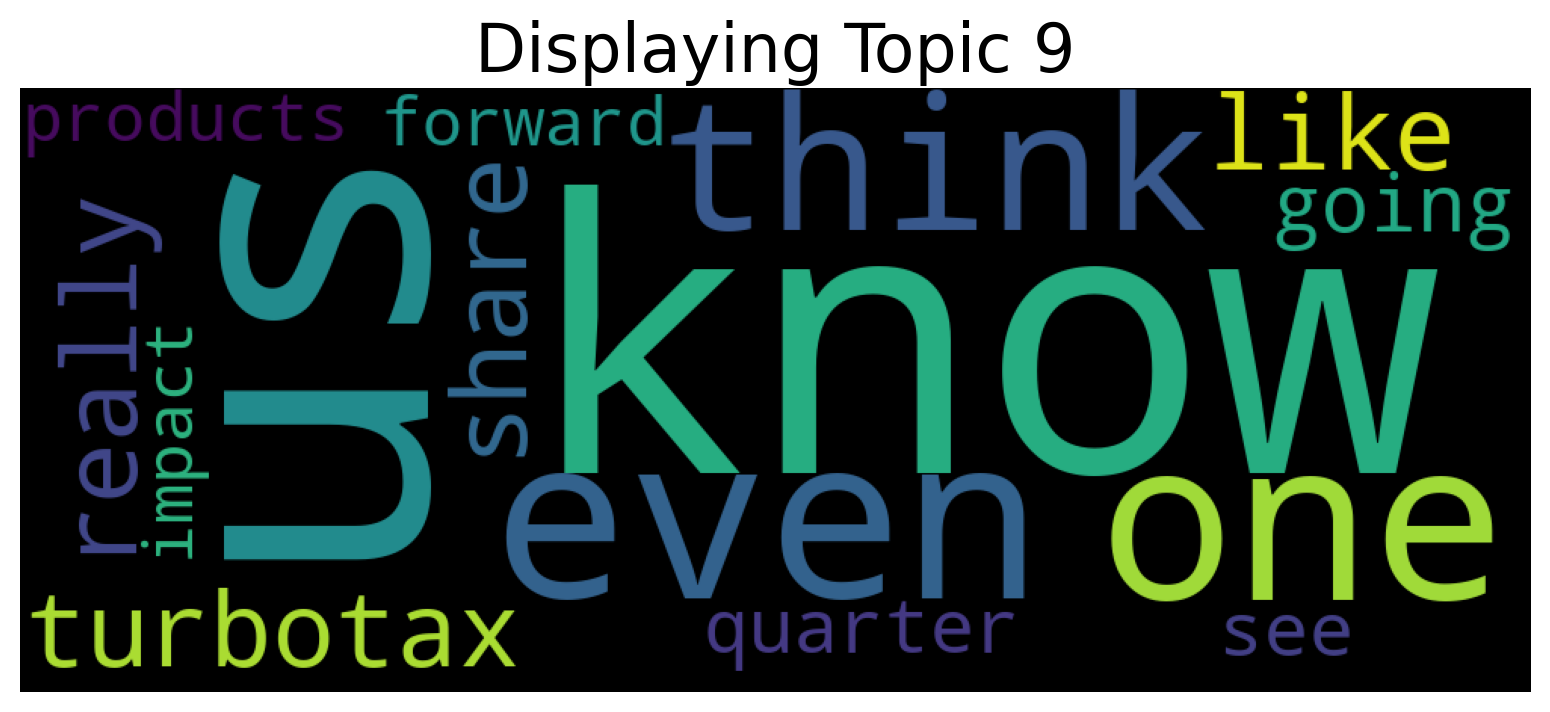

In [47]:
ctm.get_wordcloud(topic_id=9, n_words=15)

In [48]:
# PyLDAvis Visualization
lda_vis_data = ctm.get_ldavis_data_format(tp2.vocab, training_dataset, n_samples=10)

Sampling: [10/10]: : 10it [00:06,  1.59it/s]


In [49]:
import pyLDAvis as vis
lda_vis_data = ctm.get_ldavis_data_format(tp2.vocab, training_dataset, n_samples=10)
ctm_pd = vis.prepare(**lda_vis_data)
vis.display(ctm_pd)

Sampling: [10/10]: : 10it [00:06,  1.62it/s]
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [50]:
# Topic predictions
topics_predictions = ctm.get_thetas(training_dataset, n_samples=5) # get all the topic predictions

Sampling: [5/5]: : 5it [00:03,  1.66it/s]


In [51]:
preprocessed_documents[0] # see the text of our preprocessed document

'operator'

In [52]:
import numpy as np
topic_number = np.argmax(topics_predictions[0]) # get the topic id of the first document

In [53]:
topic_number

0

In [54]:
ctm.get_topic_lists(5)[5]

['strong', 'business', 'think', 'even', 'last']

In [55]:
ctm.get_topic_lists(5)[topic_number]

['worked', 'assess', 'aggressive', 'variability', 'shenzhen']

## iv) roberta-base Transformer

In [56]:
from contextualized_topic_models.models.ctm import ZeroShotTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation

tp3 = TopicModelDataPreparation("roberta-base") # instantiate a contextualized model

# create the training set
training_dataset = tp3.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

Downloading:   0%|          | 0.00/445 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.08k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/603k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.7/dist-packages/contextualized_topic_models/utils/data_preparation.py:57: UserWarning: the longest document in your collection has 304 words, the model instead truncates to 128 tokens.
  warnings.warn(f"the longest document in your c

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [57]:
tp3.vocab[:10]

['ability',
 'able',
 'absolutely',
 'acacia',
 'accelerate',
 'accelerated',
 'accelerates',
 'accelerating',
 'acceleration',
 'access']

In [58]:
# train the model
# input_size is the size of our vocabulary
# bert_input_size is the size of the embedding that comes from the contextualized model
# n_components is the number of topic we are going to get from the model
# n_epochs is the number of epochs we are going to train our model for
ctm = CombinedTM(bow_size=len(tp3.vocab), contextual_size=768, n_components=5, num_epochs=10)
ctm.fit(training_dataset) # run the model

Epoch: [10/10]	 Seen Samples: [10880/11470]	Train Loss: 99.27794153550091	Time: 0:00:01.725796: : 10it [00:13,  1.30s/it]
Sampling: [20/20]: : 20it [00:13,  1.50it/s]


In [59]:
# Getting the topics
ctm.get_topic_lists(5)

[['surface', 'behind', 'versa', 'telling', 'supports'],
 ['steve', 'occurred', 'worldwide', 'analysis', 'stations'],
 ['growth', 'customers', 'quarter', 'business', 'billion'],
 ['angles', 'win', 'agreements', 'almost', 'understandable'],
 ['would', 'terms', 'think', 'really', 'look']]

In [60]:
ctm.get_topics()

defaultdict(list,
            {0: ['surface',
              'behind',
              'versa',
              'telling',
              'supports',
              'potentially',
              'actively',
              'asking',
              'system',
              'accrue'],
             1: ['steve',
              'occurred',
              'worldwide',
              'analysis',
              'stations',
              'allowing',
              'availability',
              'size',
              'adjusting',
              'resilience'],
             2: ['growth',
              'customers',
              'quarter',
              'business',
              'billion',
              'higher',
              'consumer',
              'last',
              'year',
              'share'],
             3: ['angles',
              'win',
              'agreements',
              'almost',
              'understandable',
              'prices',
              'respond',
              'september',
       

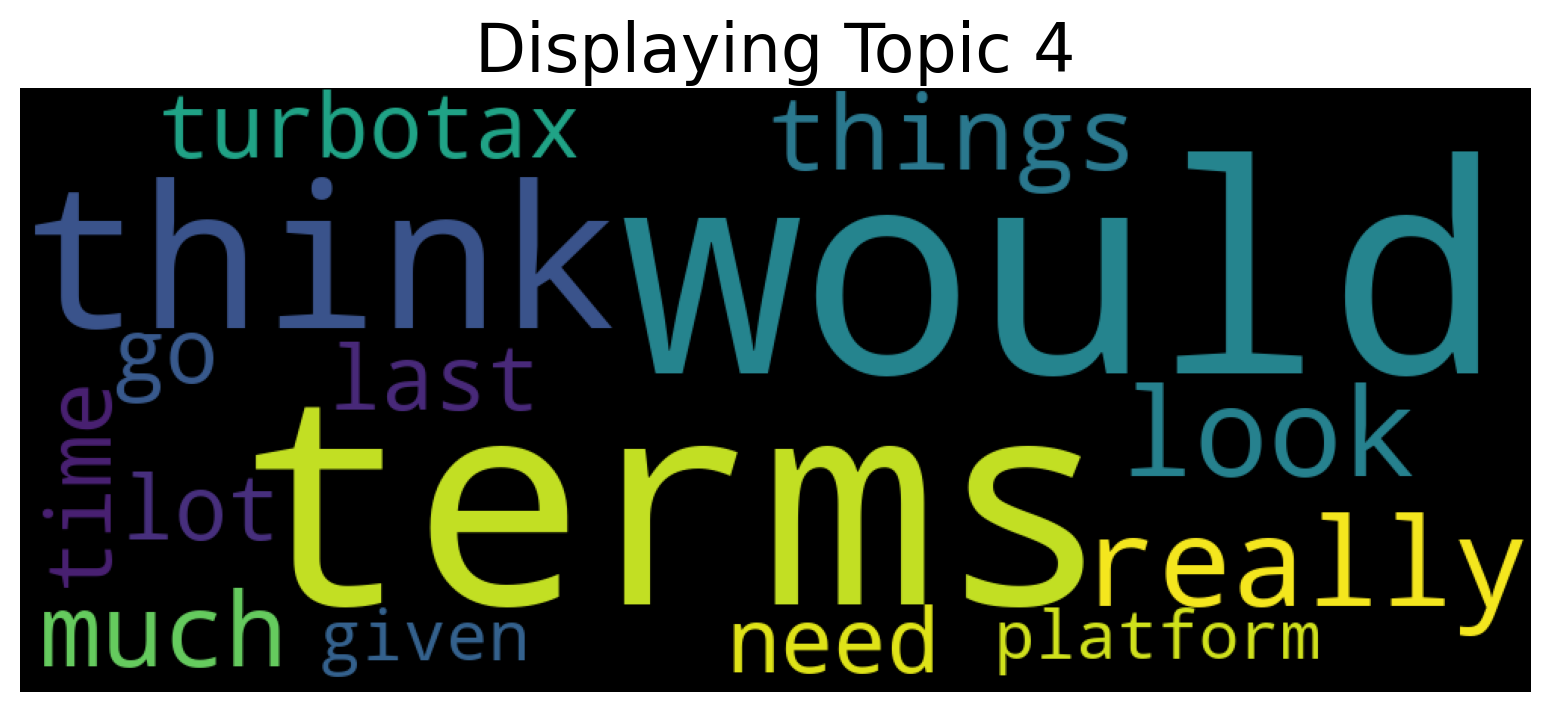

In [61]:
ctm.get_wordcloud(topic_id=4, n_words=15)

In [62]:
# PyLDAvis Visualization
lda_vis_data = ctm.get_ldavis_data_format(tp3.vocab, training_dataset, n_samples=10)

Sampling: [10/10]: : 10it [00:06,  1.54it/s]


In [63]:
import pyLDAvis as vis
lda_vis_data = ctm.get_ldavis_data_format(tp3.vocab, training_dataset, n_samples=10)
ctm_pd = vis.prepare(**lda_vis_data)
vis.display(ctm_pd)

Sampling: [10/10]: : 10it [00:06,  1.53it/s]
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [64]:
# Topic predictions
topics_predictions = ctm.get_thetas(training_dataset, n_samples=5) # get all the topic predictions

Sampling: [5/5]: : 5it [00:03,  1.61it/s]


In [65]:
preprocessed_documents[0] # see the text of our preprocessed document

'operator'

In [66]:
import numpy as np
topic_number = np.argmax(topics_predictions[0]) # get the topic id of the first document

In [67]:
topic_number

3

In [68]:
ctm.get_topic_lists(5)

[['surface', 'behind', 'versa', 'telling', 'supports'],
 ['steve', 'occurred', 'worldwide', 'analysis', 'stations'],
 ['growth', 'customers', 'quarter', 'business', 'billion'],
 ['angles', 'win', 'agreements', 'almost', 'understandable'],
 ['would', 'terms', 'think', 'really', 'look']]

In [69]:
ctm.get_topic_lists(5)[4]

['would', 'terms', 'think', 'really', 'look']

In [70]:
ctm.get_topic_lists(5)[topic_number]

['angles', 'win', 'agreements', 'almost', 'understandable']

## v) all-MiniLM-L6-v2 Transformer

In [ ]:
from contextualized_topic_models.models.ctm import ZeroShotTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation

tp4 = TopicModelDataPreparation("all-MiniLM-L6-v2") # instantiate a contextualized model

# create the training set
training_dataset = tp4.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/contextualized_topic_models/utils/data_preparation.py:57: UserWarning: the longest document in your collection has 304 words, the model instead truncates to 128 tokens.
  warnings.warn(f"the longest document in your collection has {max_local_length} words, the model instead "


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
tp4.vocab[:10]

In [ ]:
tp4.vocab[:]

In [ ]:
# train the model
# input_size is the size of our vocabulary
# bert_input_size is the size of the embedding that comes from the contextualized model
# n_components is the number of topic we are going to get from the model
# n_epochs is the number of epochs we are going to train our model for
ctm = CombinedTM(bow_size=len(tp4.vocab), contextual_size=384, n_components=10, num_epochs=10)
ctm.fit(training_dataset) # run the model

In [ ]:
# Getting the topics
ctm.get_topic_lists(5)

In [ ]:
ctm.get_topics()

In [ ]:
ctm.get_wordcloud(topic_id=9, n_words=15)

In [ ]:
# PyLDAvis Visualization
lda_vis_data = ctm.get_ldavis_data_format(tp4.vocab, training_dataset, n_samples=10)

In [ ]:
import pyLDAvis as vis
lda_vis_data = ctm.get_ldavis_data_format(tp4.vocab, training_dataset, n_samples=10)
ctm_pd = vis.prepare(**lda_vis_data)
vis.display(ctm_pd)

In [ ]:
# Topic predictions
topics_predictions = ctm.get_thetas(training_dataset, n_samples=5) # get all the topic predictions

In [ ]:
preprocessed_documents[0]

In [ ]:
import numpy as np
topic_number = np.argmax(topics_predictions[0]) 

In [ ]:
topic_number

In [ ]:
ctm.get_topic_lists(5)[5]

In [ ]:
ctm.get_topic_lists(5)[topic_number]

## vi) all-MiniLM-L12-v2 Transformer

In [86]:
from contextualized_topic_models.models.ctm import ZeroShotTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation

tp5 = TopicModelDataPreparation("all-MiniLM-L12-v2") # instantiate a contextualized model

# create the training set
training_dataset = tp5.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/contextualized_topic_models/utils/data_preparation.py:57: UserWarning: the longest document in your collection has 304 words, the model instead truncates to 128 tokens.
  warnings.warn(f"the longest document in your collection has {max_local_length} words, the model instead "


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [87]:
tp5.vocab[:10]

['ability',
 'able',
 'absolutely',
 'acacia',
 'accelerate',
 'accelerated',
 'accelerates',
 'accelerating',
 'acceleration',
 'access']

In [88]:
tp5.vocab[:1]

['ability']

In [89]:
ctm = CombinedTM(bow_size=len(tp5.vocab), contextual_size=384, n_components=10, num_epochs=10)
ctm.fit(training_dataset) # run the model

Epoch: [10/10]	 Seen Samples: [10880/11470]	Train Loss: 102.43349726059857	Time: 0:00:01.343987: : 10it [00:10,  1.04s/it]
Sampling: [20/20]: : 20it [00:13,  1.47it/s]


In [ ]:
# Getting the topics
ctm.get_topic_lists(5)

In [ ]:
ctm.get_topics()

In [ ]:
ctm.get_wordcloud(topic_id=9, n_words=15)

In [93]:
# PyLDAvis Visualization
lda_vis_data = ctm.get_ldavis_data_format(tp5.vocab, training_dataset, n_samples=10)

Sampling: [10/10]: : 10it [00:05,  1.72it/s]


In [94]:
import pyLDAvis as vis
lda_vis_data = ctm.get_ldavis_data_format(tp5.vocab, training_dataset, n_samples=10)
ctm_pd = vis.prepare(**lda_vis_data)
vis.display(ctm_pd)

Sampling: [10/10]: : 10it [00:08,  1.20it/s]
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
# Topic predictions
topics_predictions = ctm.get_thetas(training_dataset, n_samples=5) # get all the topic predictions

In [ ]:
preprocessed_documents[0] # see the text of our preprocessed document

In [97]:
import numpy as np
topic_number = np.argmax(topics_predictions[0]) # get the topic id of the first document

In [ ]:
topic_number

In [99]:
ctm.get_topic_lists(5)[5]

['really', 'supply', 'would', 'customers', 'second']

In [100]:
ctm.get_topic_lists(5)[topic_number]

['articulated', 'lives', 'powering', 'wednesday', 'streamlining']

['articulated', 'lives', 'powering', 'wednesday', 'streamlining']